# Big Data for Health (CSE6250) 

Goal: Using Logistic Regression Machine model to predict sepsis onset using MIMIC III Data

Author: Ankur Malhotra

## Logistic Regression - Model Evaluation

Train/Test data size: 4885/543
______________________________________________
Classifier: LR
Accuracy:  0.8840
AUC:  0.7360
AUPRC:  0.2813
Precision:  0.0000
Recall:  0.0000
F1-score:  0.0000
______________________________________________

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
______________________________________________
Classifier: LR
Accuracy:  0.8840
AUC:  0.7360
AUPRC:  0.2813
Precision:  0.0000
Recall:  0.0000
F1-score:  0.0000
______________________________________________



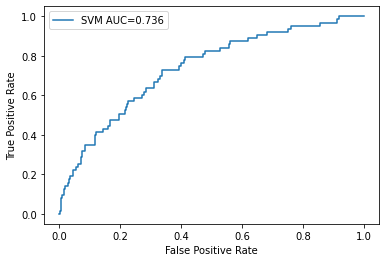

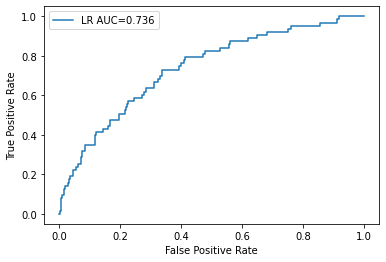

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Python.model_data import model_data
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from Python.utils import classification_metrics, plot_roc
# import warnings
# warnings.filterwarnings('ignore')
    
def sigmoid(x):
    ex = np.exp(x)
    return ex / (1 + ex)

df_train, df_test = model_data(model_type="LR", test_size=.1)
x_train, y_train = df_train.drop(columns=['label', 'icustay_id']), df_train.label
x_test, y_test = df_test.drop(columns=['label', 'icustay_id']), df_test.label

x_test = x_test.fillna(x_train.median())
x_train = x_train.fillna(x_train.median())

# scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

logistic_regression = LogisticRegression(solver='saga',max_iter=10000)

logistic_regression.fit(x_train, y_train)

y_pred = logistic_regression.predict_proba(x_test)[:,1]
classification_metrics("LR", y_test, y_pred)
plot_roc(figname="output/LR_roc.png", SVM="output/LR_roc.csv")


# Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Create regularization hyperparameter space
C = np.logspace(0, 2)
grid={"C":C, "penalty":["l2"]}#  l2 ridge
logreg=LogisticRegression(solver='saga',max_iter=10000)
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
y_pred = logreg_cv.predict_proba(x_test)[:,1]
classification_metrics("LR", y_test, y_pred)
plot_roc(figname="output/LR_roc.png", LR="output/LR_roc.csv")
